In [1]:
import cv2
import imutils
import dlib
import glob2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
DATASET = './dmd/binary_labels_lite'
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye_tree_eyeglasses.xml')

In [5]:
def detect_face(img):
    # img = imutils.resize(frame, width=640)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 4)
    print(f"Faces detected: {len(faces)}")

    if len(faces) == 0:
        return None

    # largest_rect = max(faces, key=lambda rect: rect.area())

    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # detects eyes of within the detected face area (roi)
        eyes = eye_cascade.detectMultiScale(roi_gray)

        # draw a rectangle around eyes
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,255),2)

    return img

File input path: ./dmd/binary_labels_lite/drowsy/21.jpg
Faces detected: 0
File input path: ./dmd/binary_labels_lite/drowsy/20.jpg
Faces detected: 0
File input path: ./dmd/binary_labels_lite/drowsy/22.jpg
Faces detected: 0
File input path: ./dmd/binary_labels_lite/drowsy/19.jpg
Faces detected: 0
File input path: ./dmd/binary_labels_lite/awake/2.jpg
Faces detected: 1


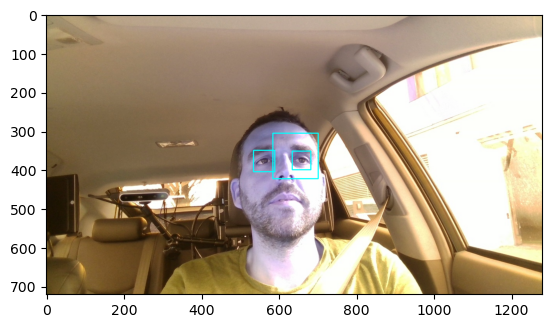

File input path: ./dmd/binary_labels_lite/awake/3.jpg
Faces detected: 1


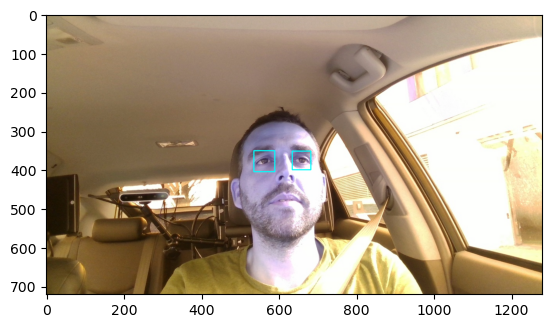

File input path: ./dmd/binary_labels_lite/awake/1.jpg
Faces detected: 1


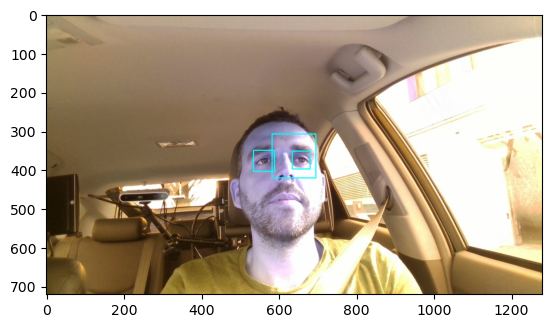

File input path: ./dmd/binary_labels_lite/awake/0.jpg
Faces detected: 1


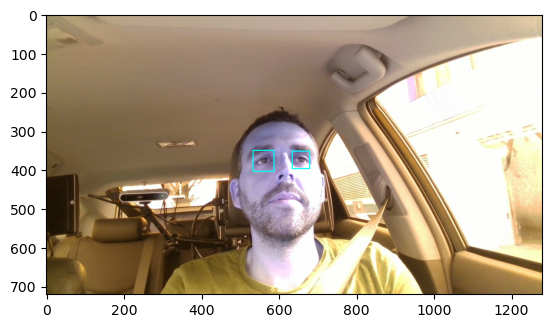

In [6]:
file_paths = glob2.glob(DATASET + '/**/*.jpg')

for i, file_path in enumerate(file_paths):
    print(f"File input path: {file_path}")
    img = cv2.imread(file_path)
    img = detect_face(img)
    if img is not None:
        plt.imshow(img)
        plt.show()